# About UPI Dataset -


*  The data for UPI transactions and it's performance relating to Banks for the month of February 2023 is pulled from National Payment Corporation of India's Website


* Webise consist of tables - 
1. UPI Top 50 Banks Performance
2. UPI Apps
3. UPI P2P and P2M Transactions
4. Top 15 PSPs
5. UPI Merchant Category Classification

* These Tables are further classified for interpretability

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline\


import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

In [3]:
import io
%cd "C:\Users\leand\OneDrive\Desktop\Data Set\\Gov\UPI" 

C:\Users\leand\OneDrive\Desktop\Data Set\Gov\UPI


In [4]:
upi_remitter_banks = pd.read_excel('UPI Remitter Banks.xlsx')

In [5]:
upi_beneficiary_banks = pd.read_excel('UPI Beneficiary Banks.xlsx')

In [6]:
upi_payer_PSP_performance = pd.read_excel('UPI Payer PSP Performance.xlsx')

In [7]:
upi_payee_PSP_performance = pd.read_excel('UPI Payee PSP Performer.xlsx')

In [8]:
UPI_P2P_and_P2M_transactions = pd.read_excel('UPI P2P and P2M Transactions.xlsx')

In [9]:
UPI_Apps_Customer_Initiated_Transactions = pd.read_excel('UPI Apps Customer Initiated Transactions.xlsx')

In [10]:
High_Transacting_Categories = pd.read_excel('High Transacting Categories.xlsx')

In [11]:
Medium_Transacting_Categories = pd.read_excel('Medium Transacting Categories.xlsx')

In [12]:
All_Other_Transacting_Categories = pd.read_excel('All Other Categories.xlsx')

# All Data tables imported with further classification

* After Classifying we have - 

1. UPI Remitter Banks
2. UPI Beneficiary Banks
3. UPI Payer PSP Performance
4. UPI Payee PSP Performance
5. UPI P2P and P2M Transactions
6. UPI Apps Customer Initiated Transactions
7. High Transacting Categories
8. Medium Transacting Categories
9. All Other Transacting Categories


# Glossary for UPI Remitter Banks - 


* Remitter - The account holder who is sending the money
       
       
* Beneficiary - The account holder who is receiving money
      
      
* Remitter Bank - The bank of the account holder who is sending the money
     
     
* Beneficiary Bank - The bank of the account holder who is receiving money


* Business Decline (BD) - Transaction decline due to a customer entering an invalid pin, incorrect beneficiary account etc. Or     due to other business reasons such as exceeding per transaction limit, exceeding permitted count of transactions per day,       exceeding amount limit for the day etc. Such declined transactions are termed as Business Decline. Any decline which is not     because of a technical reason of the bank or NPCI is termed as business Decline.


* Technical Decline (TD) - Transaction decline due to technical reasons, such as unavailability of systems and network issues on   bank or NPCI side.
    
    
* The Debit Reversal Success percentage indicates the % of total cases, where a customer account may be debited and their bank     is unable to confirm instantly about the status of reversal of such a debit. When reversal/credit is not processed instantly,   it is processed manually by the bank as per the extant RBI guidelines.
     
     
* Deemed Approved (Pending Credit Confirmation for UPI remittance transactions) - Deemed Approved percentage indicates the total   percentage of cases of the total transactions, where credit confirmations are not received online from the beneficiary banks     for the credit. If the beneficiary account is not credited online, transaction would be manually processed by the beneficiary   bank as per the extant RBI guidelines.



In [13]:
upi_remitter_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   UPI Remitter Banks                  50 non-null     object 
 1   Total Volume (In Mn)                50 non-null     float64
 2   Approved                            50 non-null     float64
 3   Business Decline                    50 non-null     float64
 4   Technical Decline                   50 non-null     float64
 5   Total Debit Reversal Count (In Mn)  50 non-null     float64
 6   Debit Reversal Success              50 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [14]:
upi_remitter_banks.shape

(50, 7)

In [15]:
upi_remitter_banks.describe()

,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,160.710000,89.795200,7.891800,2.311800,1.144000,74.325200
std,308.295416,7.256499,4.601054,3.446997,2.764143,21.837364
min,7.420000,57.400000,2.540000,0.040000,0.040000,17.540000
25%,17.242500,87.010000,4.937500,0.472500,0.100000,63.882500
50%,51.930000,92.905000,6.230000,1.045000,0.325000,82.815000
75%,160.870000,94.555000,10.785000,2.282500,1.212500,92.015000
max,1987.680000,96.880000,23.330000,19.260000,18.420000,96.950000


In [16]:
upi_remitter_banks.columns

Index(['UPI Remitter Banks', 'Total Volume (In Mn)', 'Approved',
       'Business Decline', 'Technical Decline',
       'Total Debit Reversal Count (In Mn)', 'Debit Reversal Success'],
      dtype='object')

In [17]:
upi_remitter_banks['UPI Remitter Banks'] 

0                        State Bank Of India
1                              HDFC BANK LTD
2                             Bank of Baroda
3                        Union Bank of India
4                                 ICICI Bank
5                              Axis Bank Ltd
6                        Paytm Payments Bank
7                        Kotak Mahindra Bank
8                                Canara Bank
9                       Punjab National Bank
10                             Bank of India
11                               Indian Bank
12                      Airtel Payments Bank
13                   India Post Payment Bank
14                              Federal Bank
15                     Central Bank Of India
16                      Indian Overseas Bank
17                         IDBI Bank Limited
18                       Bank of Maharashtra
19                                  UCO Bank
20                             INDUSIND BANK
21                           IDFC FIRST Bank
22        

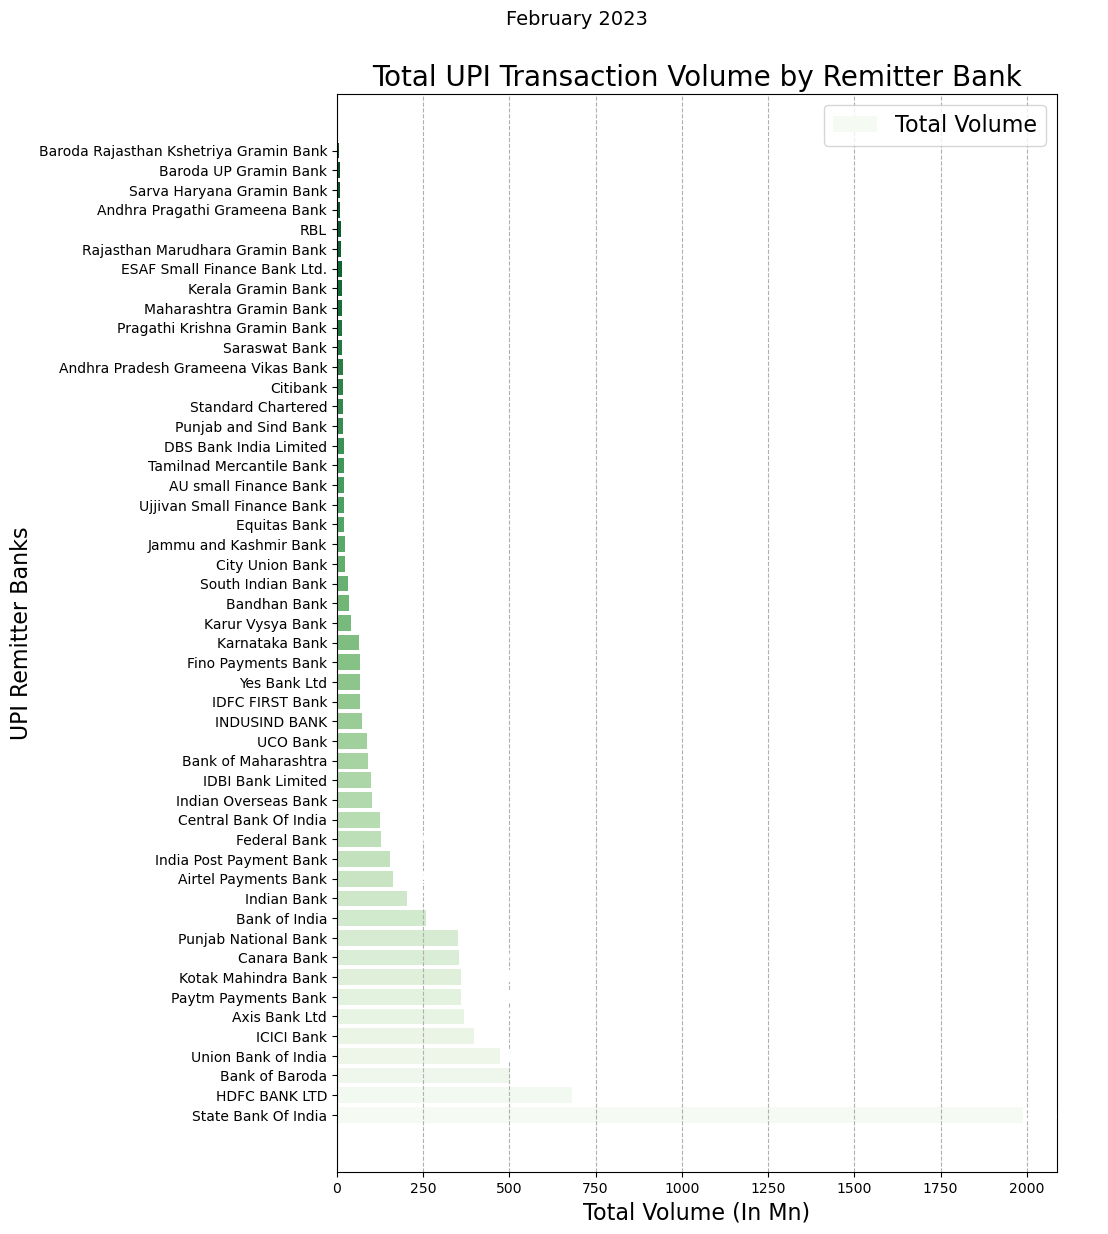

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by the total volume in descending order
upi_remitter_banks = upi_remitter_banks.sort_values('Total Volume (In Mn)', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 14))

# Create the horizontal bar plot with a color gradient
colors = sns.color_palette('Greens', len(upi_remitter_banks), desat=0.8)
plt.barh(upi_remitter_banks['UPI Remitter Banks'], upi_remitter_banks['Total Volume (In Mn)'], color=colors)

# Add data labels to each bar
for i, v in enumerate(upi_remitter_banks['Total Volume (In Mn)']):
    plt.text(v, i, str(v), color='white', fontweight='bold', fontsize=12, va='center')

# Set the title and subtitle for the plot
plt.title('Total UPI Transaction Volume by Remitter Bank', fontsize=20)
plt.suptitle('February 2023', fontsize=14, y=0.94)

# Set the labels for the x and y axis
plt.xlabel('Total Volume (In Mn)', fontsize=16)
plt.ylabel('UPI Remitter Banks', fontsize=16)

# Add a legend to explain the color coding
plt.legend(['Total Volume'], fontsize=16)

# Use a modern font and increase the font size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

# Add a grid to make it easier to read and compare values across the horizontal axis
plt.grid(axis='x', linestyle='--')

# Adjust spacing between the bars to prevent overlapping labels
plt.subplots_adjust(left=0.3)

# Display the plot
plt.show()


# Taking top 10 banks based on Total Volume

In [19]:
top_10_UPI_remitter_banks = upi_remitter_banks.nlargest(10, 'Total Volume (In Mn)')
top_10_UPI_remitter_banks

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
0,State Bank Of India,1987.68,89.00,6.43,4.57,18.42,81.67
1,HDFC BANK LTD,681.04,95.96,3.76,0.28,2.93,93.36
2,Bank of Baroda,502.38,92.92,5.81,1.28,2.83,88.16
3,Union Bank of India,472.10,93.64,4.96,1.40,4.03,54.32
4,ICICI Bank,397.14,96.50,3.29,0.21,1.27,93.18
5,Axis Bank Ltd,367.84,95.47,4.50,0.04,1.26,89.52
6,Paytm Payments Bank,360.42,96.17,3.77,0.06,0.84,92.69
7,Kotak Mahindra Bank,358.40,93.36,5.26,1.38,1.70,66.32
8,Canara Bank,354.92,93.13,6.21,0.66,2.21,83.96
9,Punjab National Bank,351.60,94.68,4.98,0.33,1.70,96.95


In [20]:
top_10_UPI_remitter_banks.columns

Index(['UPI Remitter Banks', 'Total Volume (In Mn)', 'Approved',
       'Business Decline', 'Technical Decline',
       'Total Debit Reversal Count (In Mn)', 'Debit Reversal Success'],
      dtype='object')

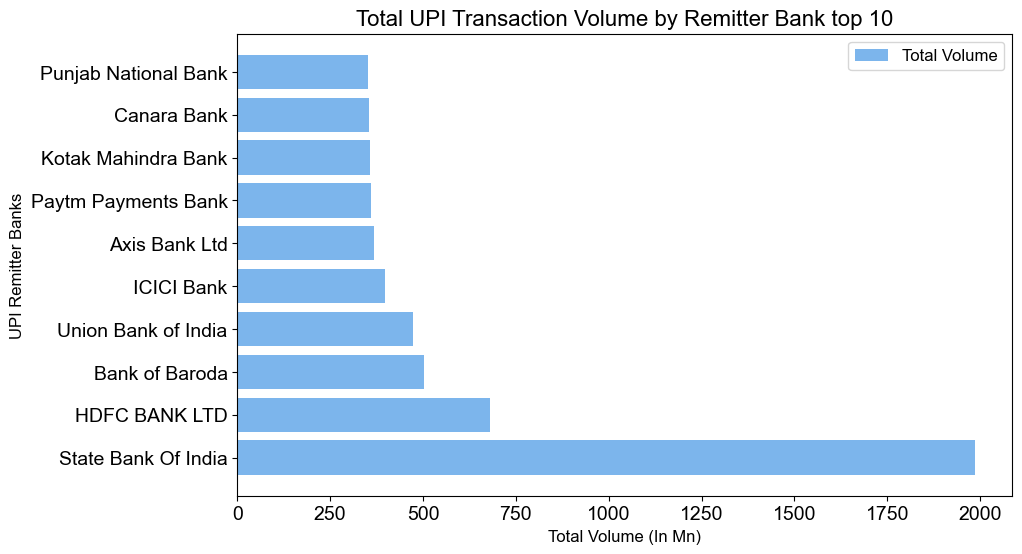

In [21]:
top_10_UPI_remitter_banks = top_10_UPI_remitter_banks.sort_values('Total Volume (In Mn)', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_UPI_remitter_banks['UPI Remitter Banks'], top_10_UPI_remitter_banks['Total Volume (In Mn)'], color='#7CB5EC')
plt.title('Total UPI Transaction Volume by Remitter Bank top 10', fontsize=16)
plt.xlabel('Total Volume (In Mn)', fontsize=12)
plt.ylabel('UPI Remitter Banks', fontsize=12)
plt.legend(['Total Volume'], fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.show()

# Let's go over bank with highest technical declines and lowest Approval

In [22]:
top_10_UPI_remitter_banks_with_highest_technical_declines = upi_remitter_banks.nlargest(10, 'Technical Decline')
top_10_UPI_remitter_banks_with_highest_technical_declines

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
47,Sarva Haryana Gramin Bank,10.03,83.21,7.66,9.13,0.25,17.54
44,Rajasthan Marudhara Gramin Bank,12.76,80.63,10.95,8.41,0.09,48.40
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
49,Baroda Rajasthan Kshetriya Gramin Bank,7.42,82.62,11.38,6.00,0.07,45.77
29,Jammu and Kashmir Bank,23.46,88.47,6.49,5.03,0.32,43.97
0,State Bank Of India,1987.68,89.00,6.43,4.57,18.42,81.67
21,IDFC FIRST Bank,67.51,91.83,4.93,3.24,0.64,35.14


In [23]:
top_10_UPI_remitter_banks_with_lowest_approved_trans = upi_remitter_banks.nsmallest(10, 'Approved')
top_10_UPI_remitter_banks_with_lowest_approved_trans

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
43,ESAF Small Finance Bank Ltd.,13.60,77.06,21.90,1.04,0.06,85.84
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
44,Rajasthan Marudhara Gramin Bank,12.76,80.63,10.95,8.41,0.09,48.40
41,Maharashtra Gramin Bank,14.93,82.05,15.61,2.34,0.12,48.33
49,Baroda Rajasthan Kshetriya Gramin Bank,7.42,82.62,11.38,6.00,0.07,45.77
47,Sarva Haryana Gramin Bank,10.03,83.21,7.66,9.13,0.25,17.54
48,Baroda UP Gramin Bank,8.91,85.45,12.15,2.39,0.06,75.51


# oops  -

* Business Decline (BD) - Transaction decline due to a customer entering an invalid pin, incorrect beneficiary account etc. Or     due to other business reasons such as exceeding per transaction limit, exceeding permitted count of transactions per day,       exceeding amount limit for the day etc. Such declined transactions are termed as Business Decline. Any decline which is not     because of a technical reason of the bank or NPCI is termed as business Decline.

In [24]:
oops = upi_remitter_banks.nlargest(10, 'Business Decline')
oops

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
43,ESAF Small Finance Bank Ltd.,13.60,77.06,21.90,1.04,0.06,85.84
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
41,Maharashtra Gramin Bank,14.93,82.05,15.61,2.34,0.12,48.33
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
12,Airtel Payments Bank,162.94,86.21,13.11,0.67,0.91,93.03
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
35,Punjab and Sind Bank,19.12,86.81,12.41,0.78,0.13,78.29
48,Baroda UP Gramin Bank,8.91,85.45,12.15,2.39,0.06,75.51
26,Bandhan Bank,33.89,85.65,11.75,2.60,0.40,77.08


# Remitter Banks with lowest DRS - 

In [25]:
banks_w_least_DRS = upi_remitter_banks.nsmallest(10, 'Debit Reversal Success')
banks_w_least_DRS

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
47,Sarva Haryana Gramin Bank,10.03,83.21,7.66,9.13,0.25,17.54
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
21,IDFC FIRST Bank,67.51,91.83,4.93,3.24,0.64,35.14
29,Jammu and Kashmir Bank,23.46,88.47,6.49,5.03,0.32,43.97
49,Baroda Rajasthan Kshetriya Gramin Bank,7.42,82.62,11.38,6.00,0.07,45.77
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
41,Maharashtra Gramin Bank,14.93,82.05,15.61,2.34,0.12,48.33
44,Rajasthan Marudhara Gramin Bank,12.76,80.63,10.95,8.41,0.09,48.40


# We have explored the data for Remitter Banks , now let's dig Beneficiary Banks

In [26]:
upi_beneficiary_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UPI Beneficiary Banks  50 non-null     object 
 1   Total Volume (In Mn)   50 non-null     float64
 2   Approved               50 non-null     float64
 3   Business Decline       50 non-null     float64
 4   Technical Decline      50 non-null     float64
 5   Deemed Approved        50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


# Glossary

* Business Decline (BD) - Transaction decline due to a customer entering an invalid pin, incorrect beneficiary account etc. Or due to other business reasons such as exceeding per transaction limit, exceeding permitted count of transactions per day, exceeding amount limit for the day etc. Such declined transactions are termed as Business Decline. Any decline which is not because of a technical reason of the bank or NPCI is termed as business Decline.


* Technical Decline (TD) - Transaction decline due to technical reasons, such as unavailability of systems and network issues on bank or NPCI side.


* The Debit Reversal Success percentage indicates the % of total cases, where a customer account may be debited and their bank is unable to confirm instantly about the status of reversal of such a debit. When reversal/credit is not processed instantly, it is processed manually by the bank as per the extant RBI guidelines.


* Deemed Approved (Pending Credit Confirmation for UPI remittance transactions) - Deemed Approved percentage indicates the total percentage of cases of the total transactions, where credit confirmations are not received online from the beneficiary banks for the credit. If the beneficiary account is not credited online, transaction would be manually processed by the beneficiary bank as per the extant RBI guidelines.


* Remitter - The account holder who is sending the money
* Beneficiary - The account holder who is receiving money
* Remitter Bank - The bank of the account holder who is sending the money
* Beneficiary Bank - The bank of the account holder who is receiving money

In [27]:
upi_beneficiary_banks.describe()

,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,146.33560,97.337600,0.666400,1.710600,0.287000
std,312.72646,2.947847,0.653858,2.370873,0.381957
min,3.73000,84.590000,0.000000,0.010000,0.010000
25%,8.47500,96.557500,0.260000,0.182500,0.092500
50%,23.07000,98.520000,0.405000,0.635000,0.180000
75%,122.34250,99.187500,0.787500,2.382500,0.305000
max,1657.41000,99.850000,2.640000,11.820000,2.110000


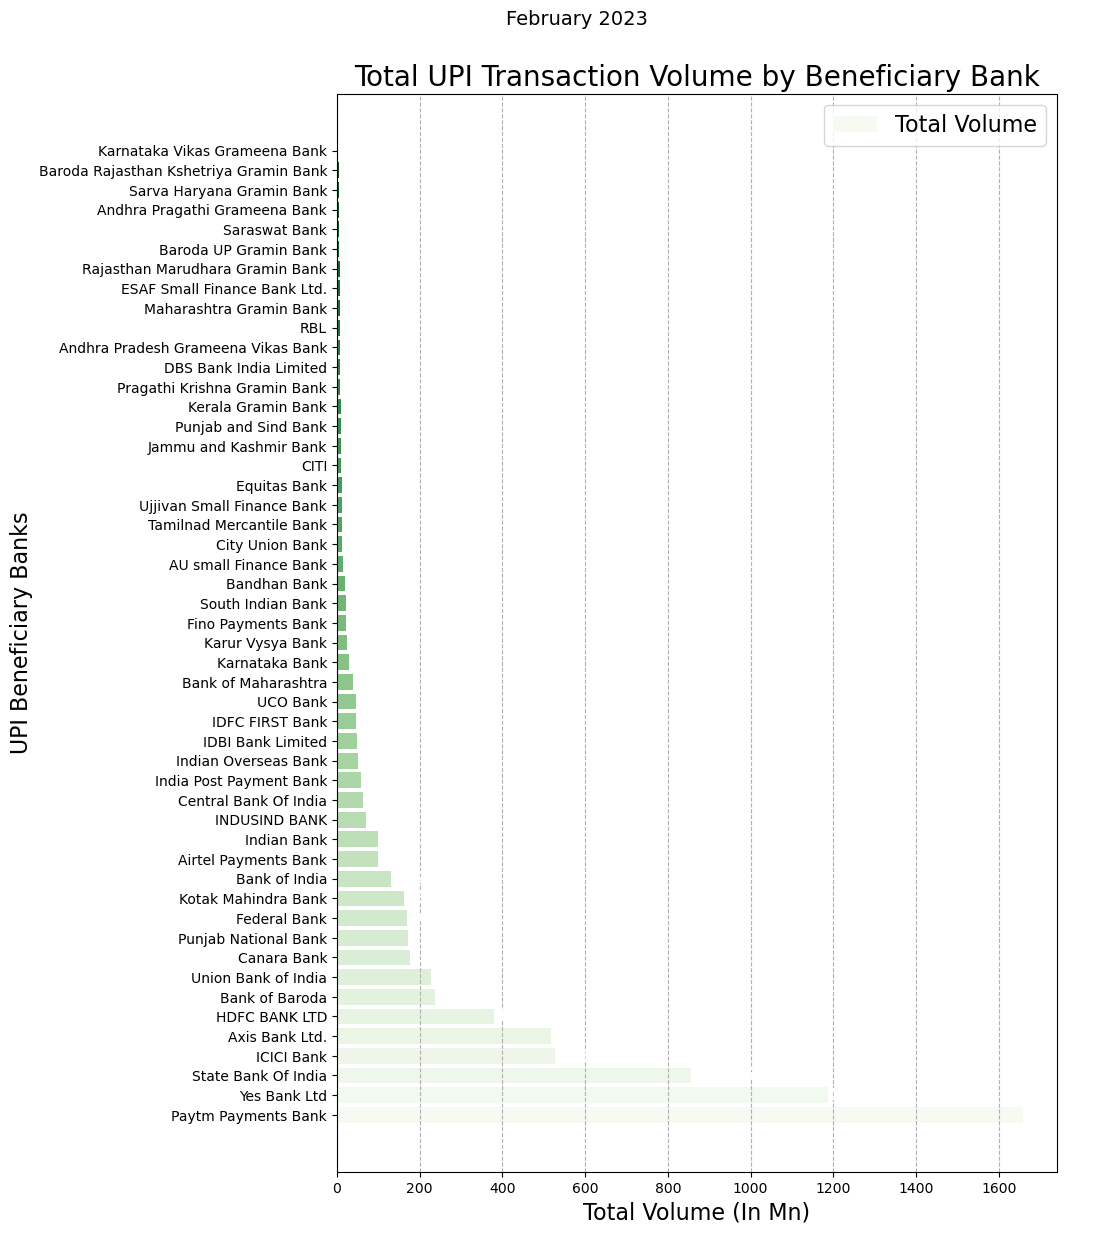

In [28]:
upi_beneficiary_banks = upi_beneficiary_banks.sort_values('Total Volume (In Mn)', ascending=False)

plt.figure(figsize=(12, 14))

colors = sns.color_palette('Greens', len(upi_remitter_banks), desat=0.8)
plt.barh(upi_beneficiary_banks['UPI Beneficiary Banks'], upi_beneficiary_banks['Total Volume (In Mn)'], color=colors)

for i, v in enumerate(upi_beneficiary_banks['Total Volume (In Mn)']):
    plt.text(v, i, str(v), color='white', fontweight='bold', fontsize=12, va='center')

plt.title('Total UPI Transaction Volume by Beneficiary Bank', fontsize=20)
plt.suptitle('February 2023', fontsize=14, y=0.94)

plt.xlabel('Total Volume (In Mn)', fontsize=16)
plt.ylabel('UPI Beneficiary Banks', fontsize=16)

plt.legend(['Total Volume'], fontsize=16)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

plt.grid(axis='x', linestyle='--')

plt.subplots_adjust(left=0.3)

plt.show()

# Taking top 10 banks based on Total Volume

In [29]:
upi_beneficiary_banks.columns

Index(['UPI Beneficiary Banks', 'Total Volume (In Mn)', 'Approved',
       'Business Decline', 'Technical Decline', 'Deemed Approved'],
      dtype='object')

In [30]:
top_10_UPI_beneficiary_banks = upi_beneficiary_banks.nlargest(10, 'Total Volume (In Mn)')
top_10_UPI_beneficiary_banks

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
0,Paytm Payments Bank,1657.41,99.76,0.21,0.02,0.01
1,Yes Bank Ltd,1186.10,99.85,0.11,0.03,0.01
2,State Bank Of India,855.15,96.01,0.26,3.40,0.33
3,ICICI Bank,528.24,99.55,0.30,0.11,0.04
4,Axis Bank Ltd.,516.94,99.83,0.14,0.01,0.02
5,HDFC BANK LTD,379.92,99.19,0.63,0.09,0.09
6,Bank of Baroda,236.71,98.48,0.41,0.95,0.16
7,Union Bank of India,227.08,98.78,0.23,0.66,0.33
8,Canara Bank,176.74,99.31,0.00,0.57,0.12
9,Punjab National Bank,171.55,99.19,0.44,0.18,0.18


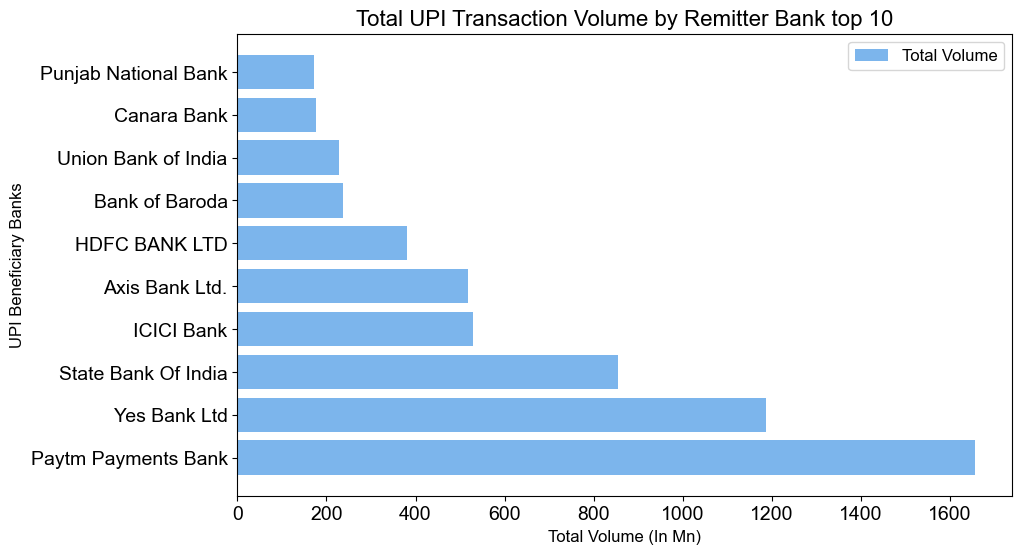

In [31]:
top_10_UPI_beneficiary_banks = top_10_UPI_beneficiary_banks.sort_values('Total Volume (In Mn)', ascending=False)

plt.figure(figsize=(10, 6))

plt.barh(top_10_UPI_beneficiary_banks['UPI Beneficiary Banks'], top_10_UPI_beneficiary_banks['Total Volume (In Mn)'], color='#7CB5EC')

plt.title('Total UPI Transaction Volume by Remitter Bank top 10', fontsize=16)

plt.xlabel('Total Volume (In Mn)', fontsize=12)
plt.ylabel('UPI Beneficiary Banks', fontsize=12)

plt.legend(['Total Volume'], fontsize=12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.show()

# Now let's look at bank with highest technical declines and lowest Approval in Beneficiary Banks

In [32]:
top_10_UPI_beneficiary_banks_with_highest_technical_declines = upi_beneficiary_banks.nlargest(10, 'Technical Decline')
top_10_UPI_beneficiary_banks_with_highest_technical_declines

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
17,India Post Payment Bank,58.50,84.59,1.48,11.82,2.11
46,Andhra Pragathi Grameena Bank,5.66,91.88,0.81,7.12,0.19
43,Rajasthan Marudhara Gramin Bank,6.66,93.33,0.43,5.95,0.29
47,Sarva Haryana Gramin Bank,4.75,92.46,0.67,5.81,1.06
49,Karnataka Vikas Grameena Bank,3.73,93.60,0.24,5.70,0.46
48,Baroda Rajasthan Kshetriya Gramin Bank,4.29,92.30,2.45,4.80,0.45
25,Fino Payments Bank,21.97,92.06,1.98,4.49,1.47
20,IDFC FIRST Bank,45.95,93.43,1.80,4.07,0.70
39,Andhra Pradesh Grameena Vikas Bank,8.06,95.05,0.30,3.77,0.88
2,State Bank Of India,855.15,96.01,0.26,3.40,0.33


In [33]:
top_10_UPI_beneficiary_banks_with_lowest_approval = upi_beneficiary_banks.nsmallest(10, 'Approved')
top_10_UPI_beneficiary_banks_with_lowest_approval

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
17,India Post Payment Bank,58.50,84.59,1.48,11.82,2.11
46,Andhra Pragathi Grameena Bank,5.66,91.88,0.81,7.12,0.19
25,Fino Payments Bank,21.97,92.06,1.98,4.49,1.47
48,Baroda Rajasthan Kshetriya Gramin Bank,4.29,92.30,2.45,4.80,0.45
47,Sarva Haryana Gramin Bank,4.75,92.46,0.67,5.81,1.06
43,Rajasthan Marudhara Gramin Bank,6.66,93.33,0.43,5.95,0.29
20,IDFC FIRST Bank,45.95,93.43,1.80,4.07,0.70
49,Karnataka Vikas Grameena Bank,3.73,93.60,0.24,5.70,0.46
44,Baroda UP Gramin Bank,6.22,94.98,2.40,2.42,0.20
39,Andhra Pradesh Grameena Vikas Bank,8.06,95.05,0.30,3.77,0.88


# Banks with lowest Deemed Approved

* Deemed Approved (Pending Credit Confirmation for UPI remittance transactions) - Deemed Approved percentage indicates the total percentage of cases of the total transactions, where credit confirmations are not received online from the beneficiary banks for the credit. If the beneficiary account is not credited online, transaction would be manually processed by the beneficiary bank as per the extant RBI guidelines. (Bhaiya mai bhej diya hu)

In [34]:
banks_w_least_DA = upi_beneficiary_banks.nlargest(10, 'Deemed Approved')
banks_w_least_DA

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
17,India Post Payment Bank,58.50,84.59,1.48,11.82,2.11
25,Fino Payments Bank,21.97,92.06,1.98,4.49,1.47
47,Sarva Haryana Gramin Bank,4.75,92.46,0.67,5.81,1.06
39,Andhra Pradesh Grameena Vikas Bank,8.06,95.05,0.30,3.77,0.88
20,IDFC FIRST Bank,45.95,93.43,1.80,4.07,0.70
11,Kotak Mahindra Bank,162.23,98.34,0.57,0.49,0.60
49,Karnataka Vikas Grameena Bank,3.73,93.60,0.24,5.70,0.46
48,Baroda Rajasthan Kshetriya Gramin Bank,4.29,92.30,2.45,4.80,0.45
16,Central Bank Of India,62.78,98.27,0.72,0.62,0.39
37,Pragathi Krishna Gramin Bank,8.39,98.70,0.34,0.62,0.34


# We have explored the data for Beneficiary Banks , now let's dig upi apps

In [35]:
UPI_Apps_Customer_Initiated_Transactions

,App Name,Volume (Mn),Value (Cr)
0,Airtel Payments Bank Apps,8.71,730.35
1,Allahabad Bank Apps,0.03,8.47
2,Amazon Pay,47.80,4981.82
3,AU Small Finance Bank Apps,0.55,165.07
4,Axis Bank Apps,7.74,1352.53
...,...,...,...
62,Union Bank Apps,0.71,280.27
63,Utkarsh Small Finance Bank Apps,0.02,9.01
64,WhatsApp,11.63,970.67
65,Yes Bank Apps,25.89,7481.18


In [36]:
UPI_Apps_Customer_Initiated_Transactions.columns

Index(['App Name', 'Volume (Mn)', 'Value (Cr)'], dtype='object')

In [37]:
top_10_UPI_apps = UPI_Apps_Customer_Initiated_Transactions.nlargest(10, 'Value (Cr)')
top_10_UPI_apps

,App Name,Volume (Mn),Value (Cr)
48,PhonePe,3519.12,620121.97
28,Google Pay,2639.55,424442.48
47,Paytm Payments Bank App,1027.97,116864.36
17,Cred,36.57,17902.20
32,ICICI Bank Apps,28.99,8054.44
65,Yes Bank Apps,25.89,7481.18
10,BHIM,23.21,7158.37
2,Amazon Pay,47.80,4981.82
30,HDFC Bank Apps,11.87,3116.03
43,Kotak Mahindra Bank Apps,12.09,2521.61


In [38]:
UPI_Apps_Customer_Initiated_Transactions['App Name']

0           Airtel Payments Bank Apps
1                 Allahabad Bank Apps
2                          Amazon Pay
3          AU Small Finance Bank Apps
4                      Axis Bank Apps
                   ...               
62                    Union Bank Apps
63    Utkarsh Small Finance Bank Apps
64                           WhatsApp
65                      Yes Bank Apps
66                             Others
Name: App Name, Length: 67, dtype: object

In [39]:
whatsapp_data = UPI_Apps_Customer_Initiated_Transactions[UPI_Apps_Customer_Initiated_Transactions['App Name'] == 'WhatsApp']
print(whatsapp_data)

    App Name  Volume (Mn)  Value (Cr)
64  WhatsApp        11.63      970.67


# Highest Transactions using UPI

In [40]:
High_Transacting_Categories

,MCC,Description
0,5411,Groceries and supermarkets
1,5812,Eating places and restaurants
2,4814,"Telecommunication services, including local an..."
3,5814,Fast food restaurants
4,5816,Digital Goods – Games
5,5541,Service stations (with or without ancillary se...
6,5311,Department stores
7,5912,Drug stores and pharmacies
8,5462,Bakeries
9,7299,Miscellaneous personal services not elsewhere ...


In [41]:
High_Transacting_Categories_sorted = High_Transacting_Categories.sort_values(by = 'MCC',ascending=False)

In [42]:
High_Transacting_Categories_sorted

,MCC,Description
9,7299,Miscellaneous personal services not elsewhere ...
7,5912,Drug stores and pharmacies
4,5816,Digital Goods – Games
3,5814,Fast food restaurants
1,5812,Eating places and restaurants
5,5541,Service stations (with or without ancillary se...
8,5462,Bakeries
0,5411,Groceries and supermarkets
6,5311,Department stores
2,4814,"Telecommunication services, including local an..."


In [43]:
Medium_Transacting_Categories

,MCC,Description
0,6540,Debit card to wallet credit (Wallet top up)*
1,4900,"Utilities - electric, gas, water and sanitary"
2,5451,Dairies
3,5813,"Drinking places (alcoholic beverages) - bars, ..."
4,7322,Debt collection agencies
5,5399,Miscellaneous general merchandise
6,6012,Financial institutions - merchandise and services
7,8999,Professional services not elsewhere classified
8,5999,Miscellaneous and speciality retail outlets
9,5422,Freezer and locker meat provisioners


In [44]:
Medium_Transacting_Categories.sort_values(by = 'MCC', ascending=False)

,MCC,Description
7,8999,Professional services not elsewhere classified
4,7322,Debt collection agencies
0,6540,Debit card to wallet credit (Wallet top up)*
6,6012,Financial institutions - merchandise and services
8,5999,Miscellaneous and speciality retail outlets
3,5813,"Drinking places (alcoholic beverages) - bars, ..."
2,5451,Dairies
9,5422,Freezer and locker meat provisioners
5,5399,Miscellaneous general merchandise
1,4900,"Utilities - electric, gas, water and sanitary"


In [45]:
All_Other_Transacting_Categories

,MCC,Description
0,6211,Securities - brokers and dealers
1,5499,Miscellaneous food shops convenience and speci...
2,9399,Government services - not elsewhere classified
3,5732,Electronics shops
4,4899,Cable and other pay television services
5,4214,Motor freight carriers and trucking - local an...
6,7399,Business services not elsewhere classified
7,4784,Tolls and bridge fees
8,5172,Petroleum and petroleum products


In [46]:
All_Other_Transacting_Categories.sort_values(by = 'MCC', ascending=False)

,MCC,Description
2,9399,Government services - not elsewhere classified
6,7399,Business services not elsewhere classified
0,6211,Securities - brokers and dealers
3,5732,Electronics shops
1,5499,Miscellaneous food shops convenience and speci...
8,5172,Petroleum and petroleum products
4,4899,Cable and other pay television services
7,4784,Tolls and bridge fees
5,4214,Motor freight carriers and trucking - local an...


# Now let's see P2P and P2M UPI transaction

In [47]:
UPI_P2P_and_P2M_transactions

,Month,Volume (Mn),Value (Cr),P2P Volume (Mn),P2P Value (Cr),P2M Volume (Mn),P2M Value (Cr)
0,February,7534.76,1235846.62,3381.56,956834.37,4153.2,279012.26


In [48]:
# Let's take important dataframes and put them in excel file then Power Bi

In [49]:
# top_10_UPI_remitter_banks
# top_10_UPI_remitter_banks_with_highest_technical_declines
# top_10_UPI_remitter_banks_with_lowest_approved_trans
# oops
# banks_w_least_DRS
# top_10_UPI_beneficiary_banks
# top_10_UPI_beneficiary_banks_with_highest_technical_declines
# banks_w_least_DA
# top_10_UPI_apps
# High_Transacting_Categories
# Medium_Transacting_Categories
# All_Other_Transacting_Categories
# UPI_P2P_and_P2M_transactions

In [50]:
top_10_UPI_remitter_banks

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
0,State Bank Of India,1987.68,89.00,6.43,4.57,18.42,81.67
1,HDFC BANK LTD,681.04,95.96,3.76,0.28,2.93,93.36
2,Bank of Baroda,502.38,92.92,5.81,1.28,2.83,88.16
3,Union Bank of India,472.10,93.64,4.96,1.40,4.03,54.32
4,ICICI Bank,397.14,96.50,3.29,0.21,1.27,93.18
5,Axis Bank Ltd,367.84,95.47,4.50,0.04,1.26,89.52
6,Paytm Payments Bank,360.42,96.17,3.77,0.06,0.84,92.69
7,Kotak Mahindra Bank,358.40,93.36,5.26,1.38,1.70,66.32
8,Canara Bank,354.92,93.13,6.21,0.66,2.21,83.96
9,Punjab National Bank,351.60,94.68,4.98,0.33,1.70,96.95


In [51]:
top_10_UPI_remitter_banks_with_highest_technical_declines

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
47,Sarva Haryana Gramin Bank,10.03,83.21,7.66,9.13,0.25,17.54
44,Rajasthan Marudhara Gramin Bank,12.76,80.63,10.95,8.41,0.09,48.40
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
49,Baroda Rajasthan Kshetriya Gramin Bank,7.42,82.62,11.38,6.00,0.07,45.77
29,Jammu and Kashmir Bank,23.46,88.47,6.49,5.03,0.32,43.97
0,State Bank Of India,1987.68,89.00,6.43,4.57,18.42,81.67
21,IDFC FIRST Bank,67.51,91.83,4.93,3.24,0.64,35.14


In [52]:
top_10_UPI_remitter_banks_with_lowest_approved_trans

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
43,ESAF Small Finance Bank Ltd.,13.60,77.06,21.90,1.04,0.06,85.84
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
44,Rajasthan Marudhara Gramin Bank,12.76,80.63,10.95,8.41,0.09,48.40
41,Maharashtra Gramin Bank,14.93,82.05,15.61,2.34,0.12,48.33
49,Baroda Rajasthan Kshetriya Gramin Bank,7.42,82.62,11.38,6.00,0.07,45.77
47,Sarva Haryana Gramin Bank,10.03,83.21,7.66,9.13,0.25,17.54
48,Baroda UP Gramin Bank,8.91,85.45,12.15,2.39,0.06,75.51


In [53]:
oops

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
43,ESAF Small Finance Bank Ltd.,13.60,77.06,21.90,1.04,0.06,85.84
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
41,Maharashtra Gramin Bank,14.93,82.05,15.61,2.34,0.12,48.33
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
12,Airtel Payments Bank,162.94,86.21,13.11,0.67,0.91,93.03
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
35,Punjab and Sind Bank,19.12,86.81,12.41,0.78,0.13,78.29
48,Baroda UP Gramin Bank,8.91,85.45,12.15,2.39,0.06,75.51
26,Bandhan Bank,33.89,85.65,11.75,2.60,0.40,77.08


In [54]:
banks_w_least_DRS

,UPI Remitter Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Total Debit Reversal Count (In Mn),Debit Reversal Success
47,Sarva Haryana Gramin Bank,10.03,83.21,7.66,9.13,0.25,17.54
46,Andhra Pragathi Grameena Bank,10.06,77.17,14.54,8.29,0.11,23.55
13,India Post Payment Bank,154.66,57.40,23.33,19.26,6.49,31.89
38,Andhra Pradesh Grameena Vikas Bank,16.28,80.56,12.46,6.98,0.17,32.54
21,IDFC FIRST Bank,67.51,91.83,4.93,3.24,0.64,35.14
29,Jammu and Kashmir Bank,23.46,88.47,6.49,5.03,0.32,43.97
49,Baroda Rajasthan Kshetriya Gramin Bank,7.42,82.62,11.38,6.00,0.07,45.77
23,Fino Payments Bank,66.29,76.37,15.66,7.97,1.62,47.82
41,Maharashtra Gramin Bank,14.93,82.05,15.61,2.34,0.12,48.33
44,Rajasthan Marudhara Gramin Bank,12.76,80.63,10.95,8.41,0.09,48.40


In [55]:
top_10_UPI_beneficiary_banks

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
0,Paytm Payments Bank,1657.41,99.76,0.21,0.02,0.01
1,Yes Bank Ltd,1186.10,99.85,0.11,0.03,0.01
2,State Bank Of India,855.15,96.01,0.26,3.40,0.33
3,ICICI Bank,528.24,99.55,0.30,0.11,0.04
4,Axis Bank Ltd.,516.94,99.83,0.14,0.01,0.02
5,HDFC BANK LTD,379.92,99.19,0.63,0.09,0.09
6,Bank of Baroda,236.71,98.48,0.41,0.95,0.16
7,Union Bank of India,227.08,98.78,0.23,0.66,0.33
8,Canara Bank,176.74,99.31,0.00,0.57,0.12
9,Punjab National Bank,171.55,99.19,0.44,0.18,0.18


In [56]:
top_10_UPI_beneficiary_banks_with_highest_technical_declines

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
17,India Post Payment Bank,58.50,84.59,1.48,11.82,2.11
46,Andhra Pragathi Grameena Bank,5.66,91.88,0.81,7.12,0.19
43,Rajasthan Marudhara Gramin Bank,6.66,93.33,0.43,5.95,0.29
47,Sarva Haryana Gramin Bank,4.75,92.46,0.67,5.81,1.06
49,Karnataka Vikas Grameena Bank,3.73,93.60,0.24,5.70,0.46
48,Baroda Rajasthan Kshetriya Gramin Bank,4.29,92.30,2.45,4.80,0.45
25,Fino Payments Bank,21.97,92.06,1.98,4.49,1.47
20,IDFC FIRST Bank,45.95,93.43,1.80,4.07,0.70
39,Andhra Pradesh Grameena Vikas Bank,8.06,95.05,0.30,3.77,0.88
2,State Bank Of India,855.15,96.01,0.26,3.40,0.33


In [57]:
banks_w_least_DA

,UPI Beneficiary Banks,Total Volume (In Mn),Approved,Business Decline,Technical Decline,Deemed Approved
17,India Post Payment Bank,58.50,84.59,1.48,11.82,2.11
25,Fino Payments Bank,21.97,92.06,1.98,4.49,1.47
47,Sarva Haryana Gramin Bank,4.75,92.46,0.67,5.81,1.06
39,Andhra Pradesh Grameena Vikas Bank,8.06,95.05,0.30,3.77,0.88
20,IDFC FIRST Bank,45.95,93.43,1.80,4.07,0.70
11,Kotak Mahindra Bank,162.23,98.34,0.57,0.49,0.60
49,Karnataka Vikas Grameena Bank,3.73,93.60,0.24,5.70,0.46
48,Baroda Rajasthan Kshetriya Gramin Bank,4.29,92.30,2.45,4.80,0.45
16,Central Bank Of India,62.78,98.27,0.72,0.62,0.39
37,Pragathi Krishna Gramin Bank,8.39,98.70,0.34,0.62,0.34


In [58]:
top_10_UPI_apps

,App Name,Volume (Mn),Value (Cr)
48,PhonePe,3519.12,620121.97
28,Google Pay,2639.55,424442.48
47,Paytm Payments Bank App,1027.97,116864.36
17,Cred,36.57,17902.20
32,ICICI Bank Apps,28.99,8054.44
65,Yes Bank Apps,25.89,7481.18
10,BHIM,23.21,7158.37
2,Amazon Pay,47.80,4981.82
30,HDFC Bank Apps,11.87,3116.03
43,Kotak Mahindra Bank Apps,12.09,2521.61


In [59]:
High_Transacting_Categories

,MCC,Description
0,5411,Groceries and supermarkets
1,5812,Eating places and restaurants
2,4814,"Telecommunication services, including local an..."
3,5814,Fast food restaurants
4,5816,Digital Goods – Games
5,5541,Service stations (with or without ancillary se...
6,5311,Department stores
7,5912,Drug stores and pharmacies
8,5462,Bakeries
9,7299,Miscellaneous personal services not elsewhere ...


In [60]:
Medium_Transacting_Categories

,MCC,Description
0,6540,Debit card to wallet credit (Wallet top up)*
1,4900,"Utilities - electric, gas, water and sanitary"
2,5451,Dairies
3,5813,"Drinking places (alcoholic beverages) - bars, ..."
4,7322,Debt collection agencies
5,5399,Miscellaneous general merchandise
6,6012,Financial institutions - merchandise and services
7,8999,Professional services not elsewhere classified
8,5999,Miscellaneous and speciality retail outlets
9,5422,Freezer and locker meat provisioners


In [61]:
All_Other_Transacting_Categories

,MCC,Description
0,6211,Securities - brokers and dealers
1,5499,Miscellaneous food shops convenience and speci...
2,9399,Government services - not elsewhere classified
3,5732,Electronics shops
4,4899,Cable and other pay television services
5,4214,Motor freight carriers and trucking - local an...
6,7399,Business services not elsewhere classified
7,4784,Tolls and bridge fees
8,5172,Petroleum and petroleum products


In [62]:
UPI_P2P_and_P2M_transactions

,Month,Volume (Mn),Value (Cr),P2P Volume (Mn),P2P Value (Cr),P2M Volume (Mn),P2M Value (Cr)
0,February,7534.76,1235846.62,3381.56,956834.37,4153.2,279012.26
